<a href="https://colab.research.google.com/github/sayan0506/HardHead-Detection-for-Safety-Surveilance-using-YOLOV3/blob/main/colab_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YoloV3 TF2 GPU Colab Notebook

##### 1.  Clone and install dependencies 

**IMPORTANT**: Restart following the instruction

In [1]:
!git clone https://github.com/zzh8829/yolov3-tf2
%cd yolov3-tf2/
!pip install -r requirements-gpu.txt

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 419, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 419 (delta 2), reused 2 (delta 0), pack-reused 412
Receiving objects: 100% (419/419), 4.24 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (239/239), done.
/content/yolov3-tf2
Obtaining file:///content/yolov3-tf2 (from -r requirements-gpu.txt (line 6))
     |████████████████████████████████| 394.5 MB 36 kB/s 
     |████████████████████████████████| 28.7 MB 53 kB/s 
     |████████████████████████████████| 2.9 MB 60.2 MB/s 
     |████████████████████████████████| 3.8 MB 51.5 MB/s 
     |████████████████████████████████| 462 kB 60.6 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorf

##### 2.  Check Tensorflow2 version

In [3]:
%cd /content/yolov3-tf2
!ls

import tensorflow as tf
tf.__version__

/content/yolov3-tf2
checkpoints	 data		  README.md		train.py
colab_gpu.ipynb  detect.py	  requirements-gpu.txt	yolov3_tf2
conda-cpu.yml	 detect_video.py  requirements.txt	yolov3_tf2.egg-info
conda-gpu.yml	 docs		  setup.py
convert.py	 LICENSE	  tools


'2.4.2'

##### 3.  Convert Pretrained Darknet Weight

In [4]:
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
!python convert.py

--2021-08-12 19:01:11--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M  60.1MB/s    in 4.2s    

2021-08-12 19:01:15 (56.4 MB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]

2021-08-12 19:01:16.070219: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-08-12 19:01:17.598625: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-12 19:01:17.599508: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-08-12 19:01:17.649781: I tensorflow/stream_executor/cuda/cuda_gpu_exec

##### 4. Initialize Detector

In [5]:
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf',
                    'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')

app._run_init(['yolov3'], app.parse_flags_with_usage)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

##### 4. Detect Image

I0812 19:05:39.156404 139819611207552 <ipython-input-6-b1b93607b63e>:9] weights loaded
I0812 19:05:39.161362 139819611207552 <ipython-input-6-b1b93607b63e>:12] classes loaded
I0812 19:05:40.967553 139819611207552 <ipython-input-6-b1b93607b63e>:23] time: 1.7653155326843262
I0812 19:05:40.969217 139819611207552 <ipython-input-6-b1b93607b63e>:25] detections:
I0812 19:05:40.976841 139819611207552 <ipython-input-6-b1b93607b63e>:29] 	cup, 0.9980731010437012, [0.1426622  0.52777606 0.27184254 0.65748256]
I0812 19:05:40.980449 139819611207552 <ipython-input-6-b1b93607b63e>:29] 	person, 0.9976975321769714, [0.28982916 0.09854662 0.95846486 0.9202167 ]
I0812 19:05:40.984048 139819611207552 <ipython-input-6-b1b93607b63e>:29] 	laptop, 0.9599869847297668, [-0.01710668  0.39493686  0.5229728   0.7962776 ]
I0812 19:05:40.989331 139819611207552 <ipython-input-6-b1b93607b63e>:29] 	apple, 0.9081626534461975, [0.13114461 0.77143586 0.22893354 0.90729535]
I0812 19:05:40.999521 139819611207552 <ipython-inp

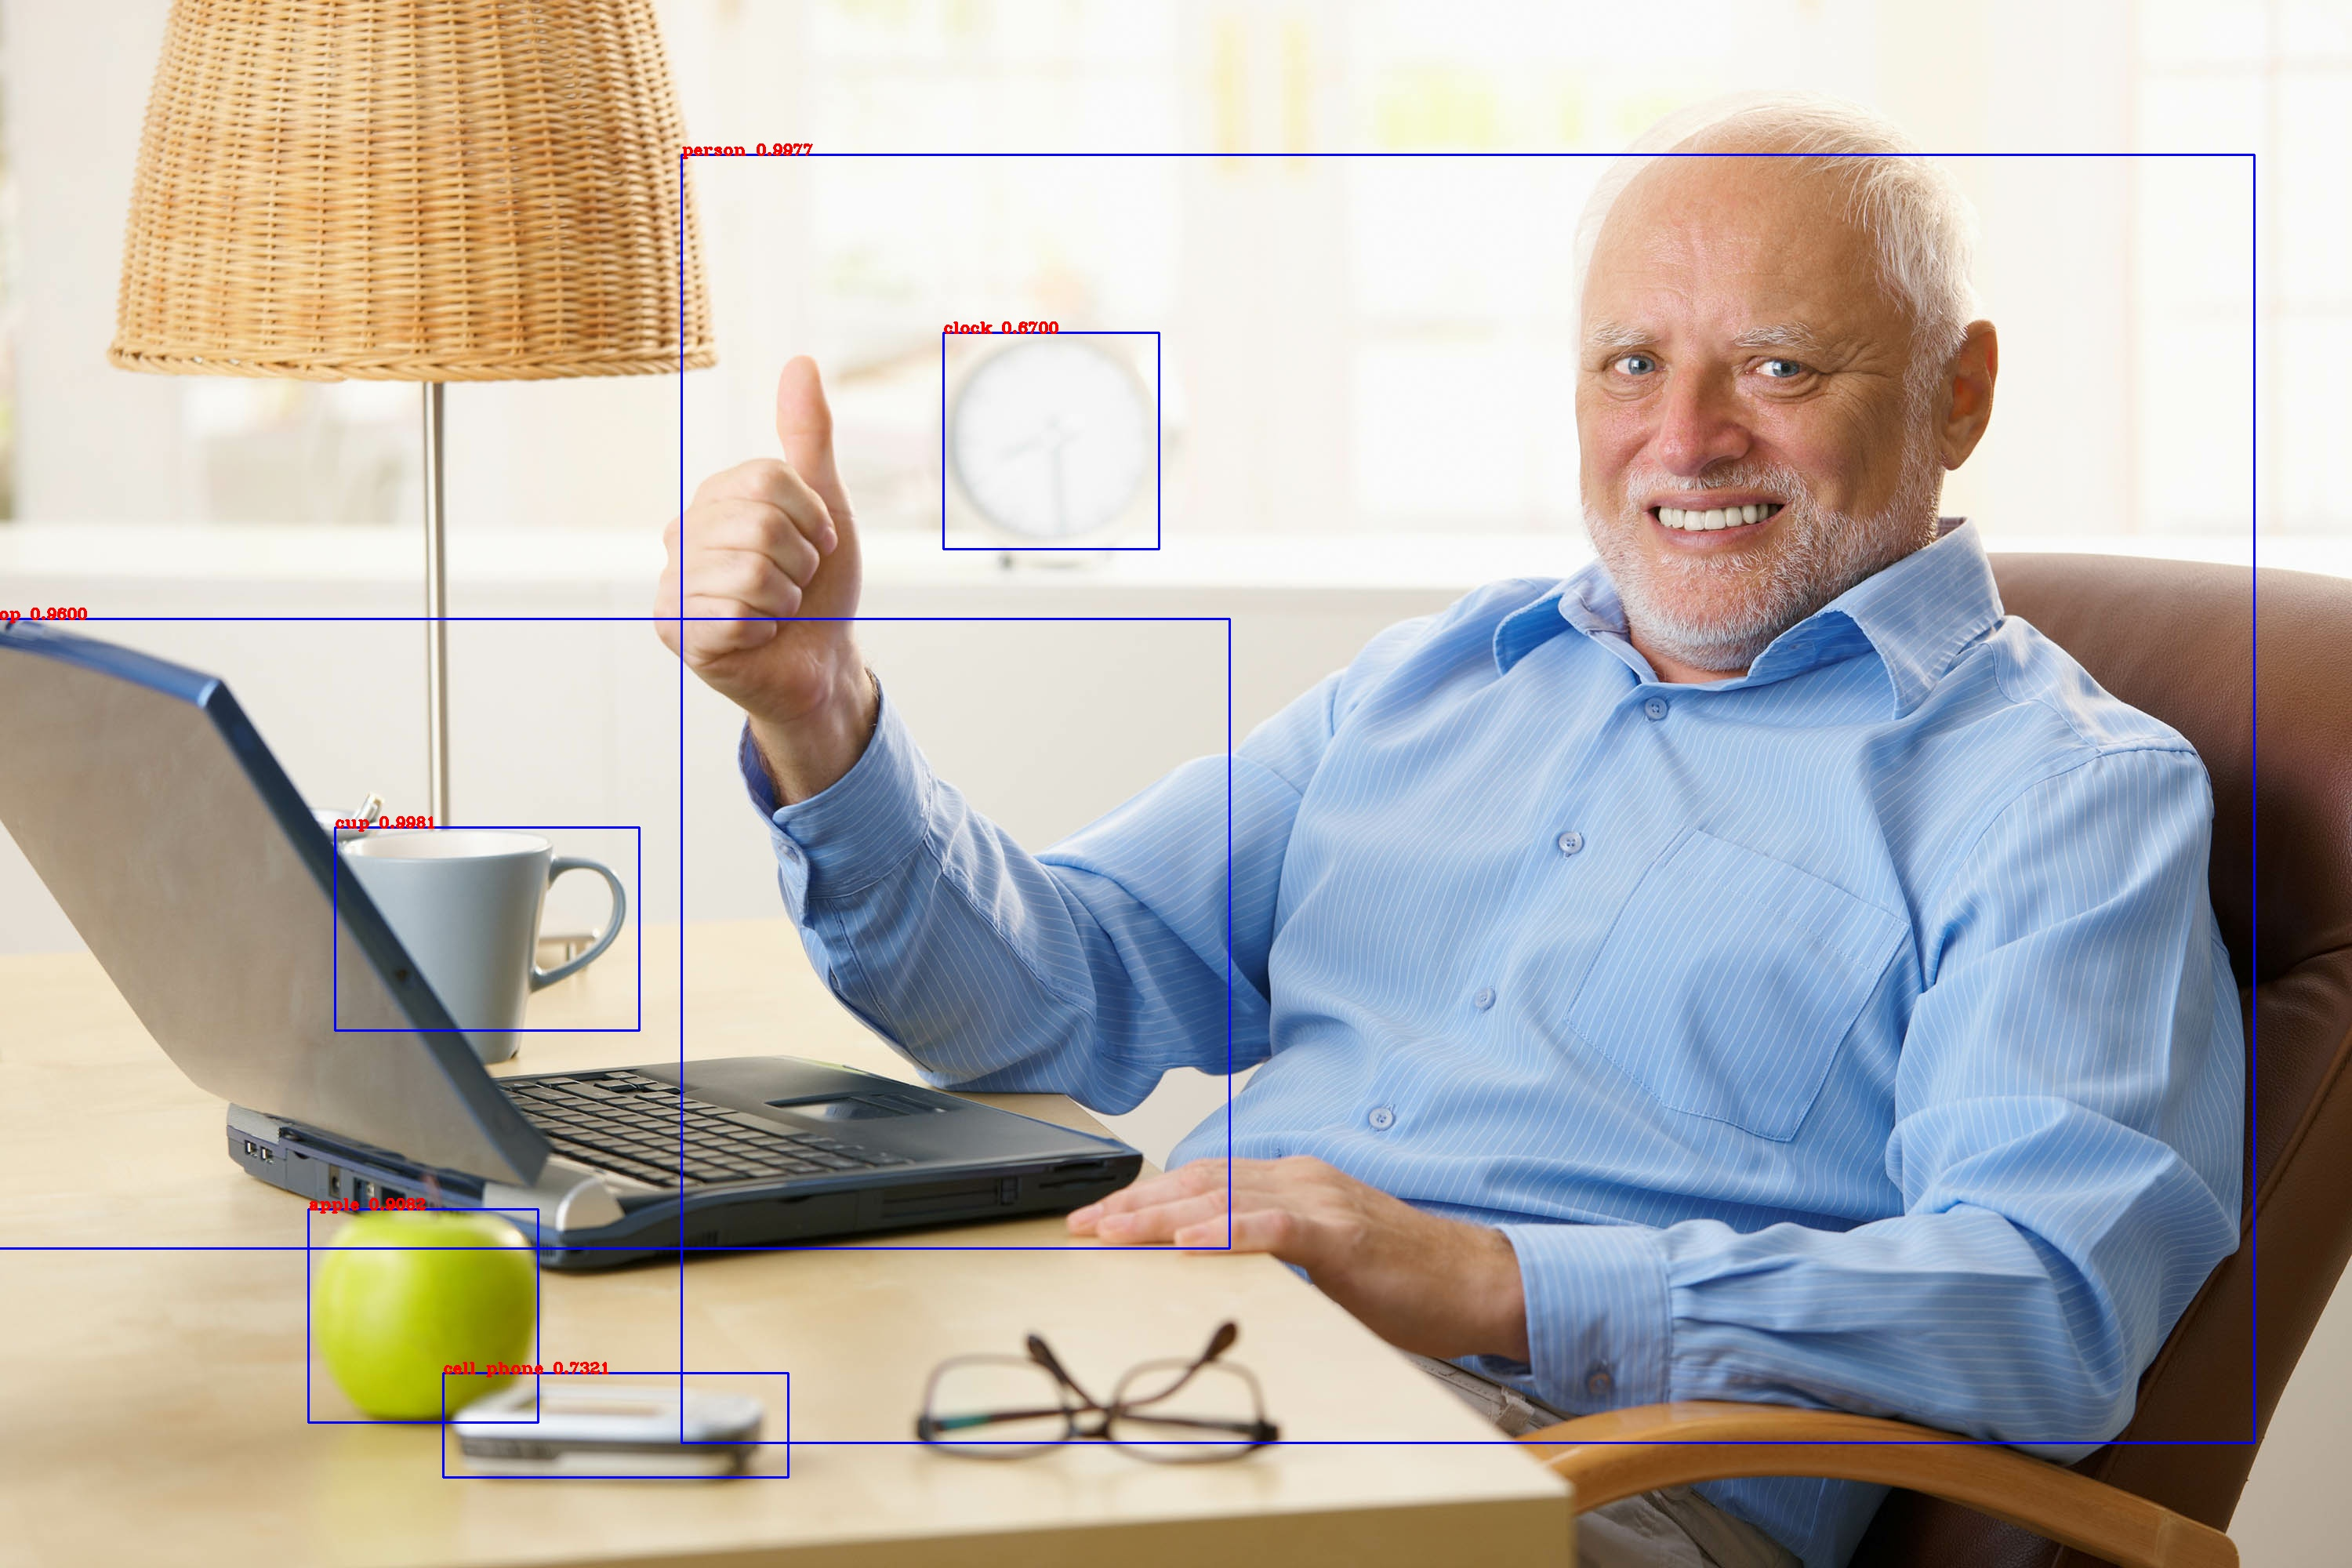

In [6]:
FLAGS.image = 'data/meme.jpg'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

from IPython.display import Image, display
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

##### 5. Training New Dataset

In [14]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar -O ./data/voc2009_raw.tar
!mkdir -p ./data/voc2009_raw
!tar -xf ./data/voc2009_raw.tar -C ./data/voc2009_raw

--2021-08-12 19:45:02--  http://host.robots.ox.ac.uk/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935534080 (892M) [application/x-tar]
Saving to: ‘./data/voc2009_raw.tar’

./data/voc2009_raw. 100%[===================>] 892.19M  12.6MB/s    in 72s     

2021-08-12 19:46:14 (12.4 MB/s) - ‘./data/voc2009_raw.tar’ saved [935534080/935534080]



## **Drive Mount**

In [10]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
import zipfile
import os

In [12]:
def unzipping(src, dst):
  if not os.path.isdir(dst):
    os.mkdir(dst)

  with zipfile.ZipFile(src, 'r') as zip_ref:
    zip_ref.extractall(dst)

In [13]:
unzipping('/content/drive/MyDrive/HardHead Dataset/HardHat_Dataset.zip', 'hardhat_dataset')

In [56]:
!python tools/voc2012.py \
  --data_dir '/content/yolov3-tf2/hardhat_dataset' \
  --split train \
  --output_file ./data/voc_train.tfrecord
'''
!python tools/voc2012.py \
  --data_dir './data/voc2009_raw/VOCdevkit/VOC2009' \
  --split val \
  --output_file ./data/voc_val.tfrecord
'''

2021-08-12 20:58:12.559911: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
I0812 20:58:14.260483 139670257014656 voc2012.py:93] Class mapping loaded: {'helmet': 0, 'head': 1}
100% 4750/4750 [00:00<00:00, 1705293.50it/s]
I0812 20:58:14.267197 139670257014656 voc2012.py:103] Image list loaded: 4750
['hard_hat_workers1858', 'hard_hat_workers2218', 'hard_hat_workers1828', 'hard_hat_workers582', 'hard_hat_workers129', 'hard_hat_workers3880', 'hard_hat_workers61', 'hard_hat_workers1354', 'hard_hat_workers4814', 'hard_hat_workers3924', 'hard_hat_workers1298', 'hard_hat_workers3017', 'hard_hat_workers4779', 'hard_hat_workers1659', 'hard_hat_workers4568', 'hard_hat_workers2637', 'hard_hat_workers3083', 'hard_hat_workers605', 'hard_hat_workers2976', 'hard_hat_workers3803', 'hard_hat_workers3750', 'hard_hat_workers495', 'hard_hat_workers3686', 'hard_hat_workers270', 'hard_hat_workers638', 'hard_hat_workers2739', 'hard_hat_work

"\n!python tools/voc2012.py   --data_dir './data/voc2009_raw/VOCdevkit/VOC2009'   --split val   --output_file ./data/voc_val.tfrecord\n"

In [36]:
import tqdm 

img_list = os.listdir('/content/yolov3-tf2/hardhat_dataset/images')
annot_list = os.listdir('/content/yolov3-tf2/hardhat_dataset/annotations')
img_names = []

for i in tqdm.tqdm(img_list[:5]):
  img_names.append(i.split('.')[0])

for j in tqdm.tqdm(annot_list[:5]):
  print(j.split('.')[0])

img_names

100%|██████████| 5/5 [00:00<00:00, 14727.19it/s]

hard_hat_workers154
hard_hat_workers2725
hard_hat_workers3535
hard_hat_workers2366
hard_hat_workers2740


['hard_hat_workers1858',
 'hard_hat_workers2218',
 'hard_hat_workers1828',
 'hard_hat_workers582',
 'hard_hat_workers129']

In [66]:
tf.lookup.TextFileIndex.LINE_NUMBER

-1

In [65]:
LINE_NUMBER= tf.lookup.TextFileIndex.LINE_NUMBER
class_table = tf.lookup.StaticHashTable(tf.lookup.TextFileInitializer(
        '/content/yolov3-tf2/data/voc2012.names', tf.string, 0, tf.int64, LINE_NUMBER, delimiter="\n"), -1)

In [67]:
!python tools/visualize_dataset.py --dataset ./data/voc_train.tfrecord --classes=./data/voc2012.names

2021-08-12 21:10:00.250623: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
I0812 21:10:01.718533 140461294884736 visualize_dataset.py:23] classes loaded
2021-08-12 21:10:01.718910: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-12 21:10:01.719836: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-08-12 21:10:01.725274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-12 21:10:01.725530: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2021

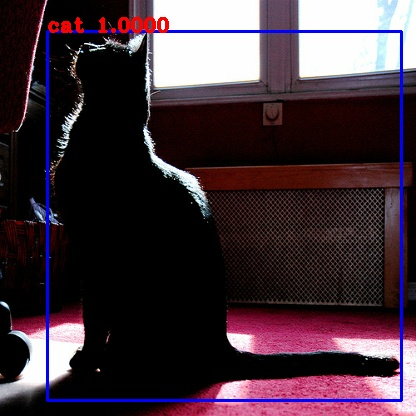

In [ ]:
from IPython.display import Image
Image(filename='./output.jpg')

In [ ]:
!python train.py \
	--dataset ./data/voc_train.tfrecord \
	--val_dataset ./data/voc_val.tfrecord \
	--classes ./data/voc2012.names \
	--num_classes 20 \
	--mode fit --transfer darknet \
	--batch_size 16 \
	--epochs 3 \
	--weights ./checkpoints/yolov3.tf \
	--weights_num_classes 80 

2020-02-02 07:44:14.946313: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-02-02 07:44:14.946449: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-02-02 07:44:14.946465: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Epoch 1/3
2020-02-02 07:44:51.124510: W tensorflow/core/common_runtime/bfc_allocator.cc:309] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to

##### 6. Detect using new weights

80
checkpoints/yolov3_train_3.tf
False


I0202 08:07:54.499751 139839832848256 <ipython-input-23-b2060d0f067f>:20] weights loaded
I0202 08:07:54.501296 139839832848256 <ipython-input-23-b2060d0f067f>:23] classes loaded
I0202 08:07:54.765269 139839832848256 <ipython-input-23-b2060d0f067f>:34] time: 0.22004270553588867
I0202 08:07:54.766204 139839832848256 <ipython-input-23-b2060d0f067f>:36] detections:
I0202 08:07:54.773281 139839832848256 <ipython-input-23-b2060d0f067f>:40] 	person, 0.20115408301353455, [0.2177423  0.2220931  0.95681787 0.77683055]


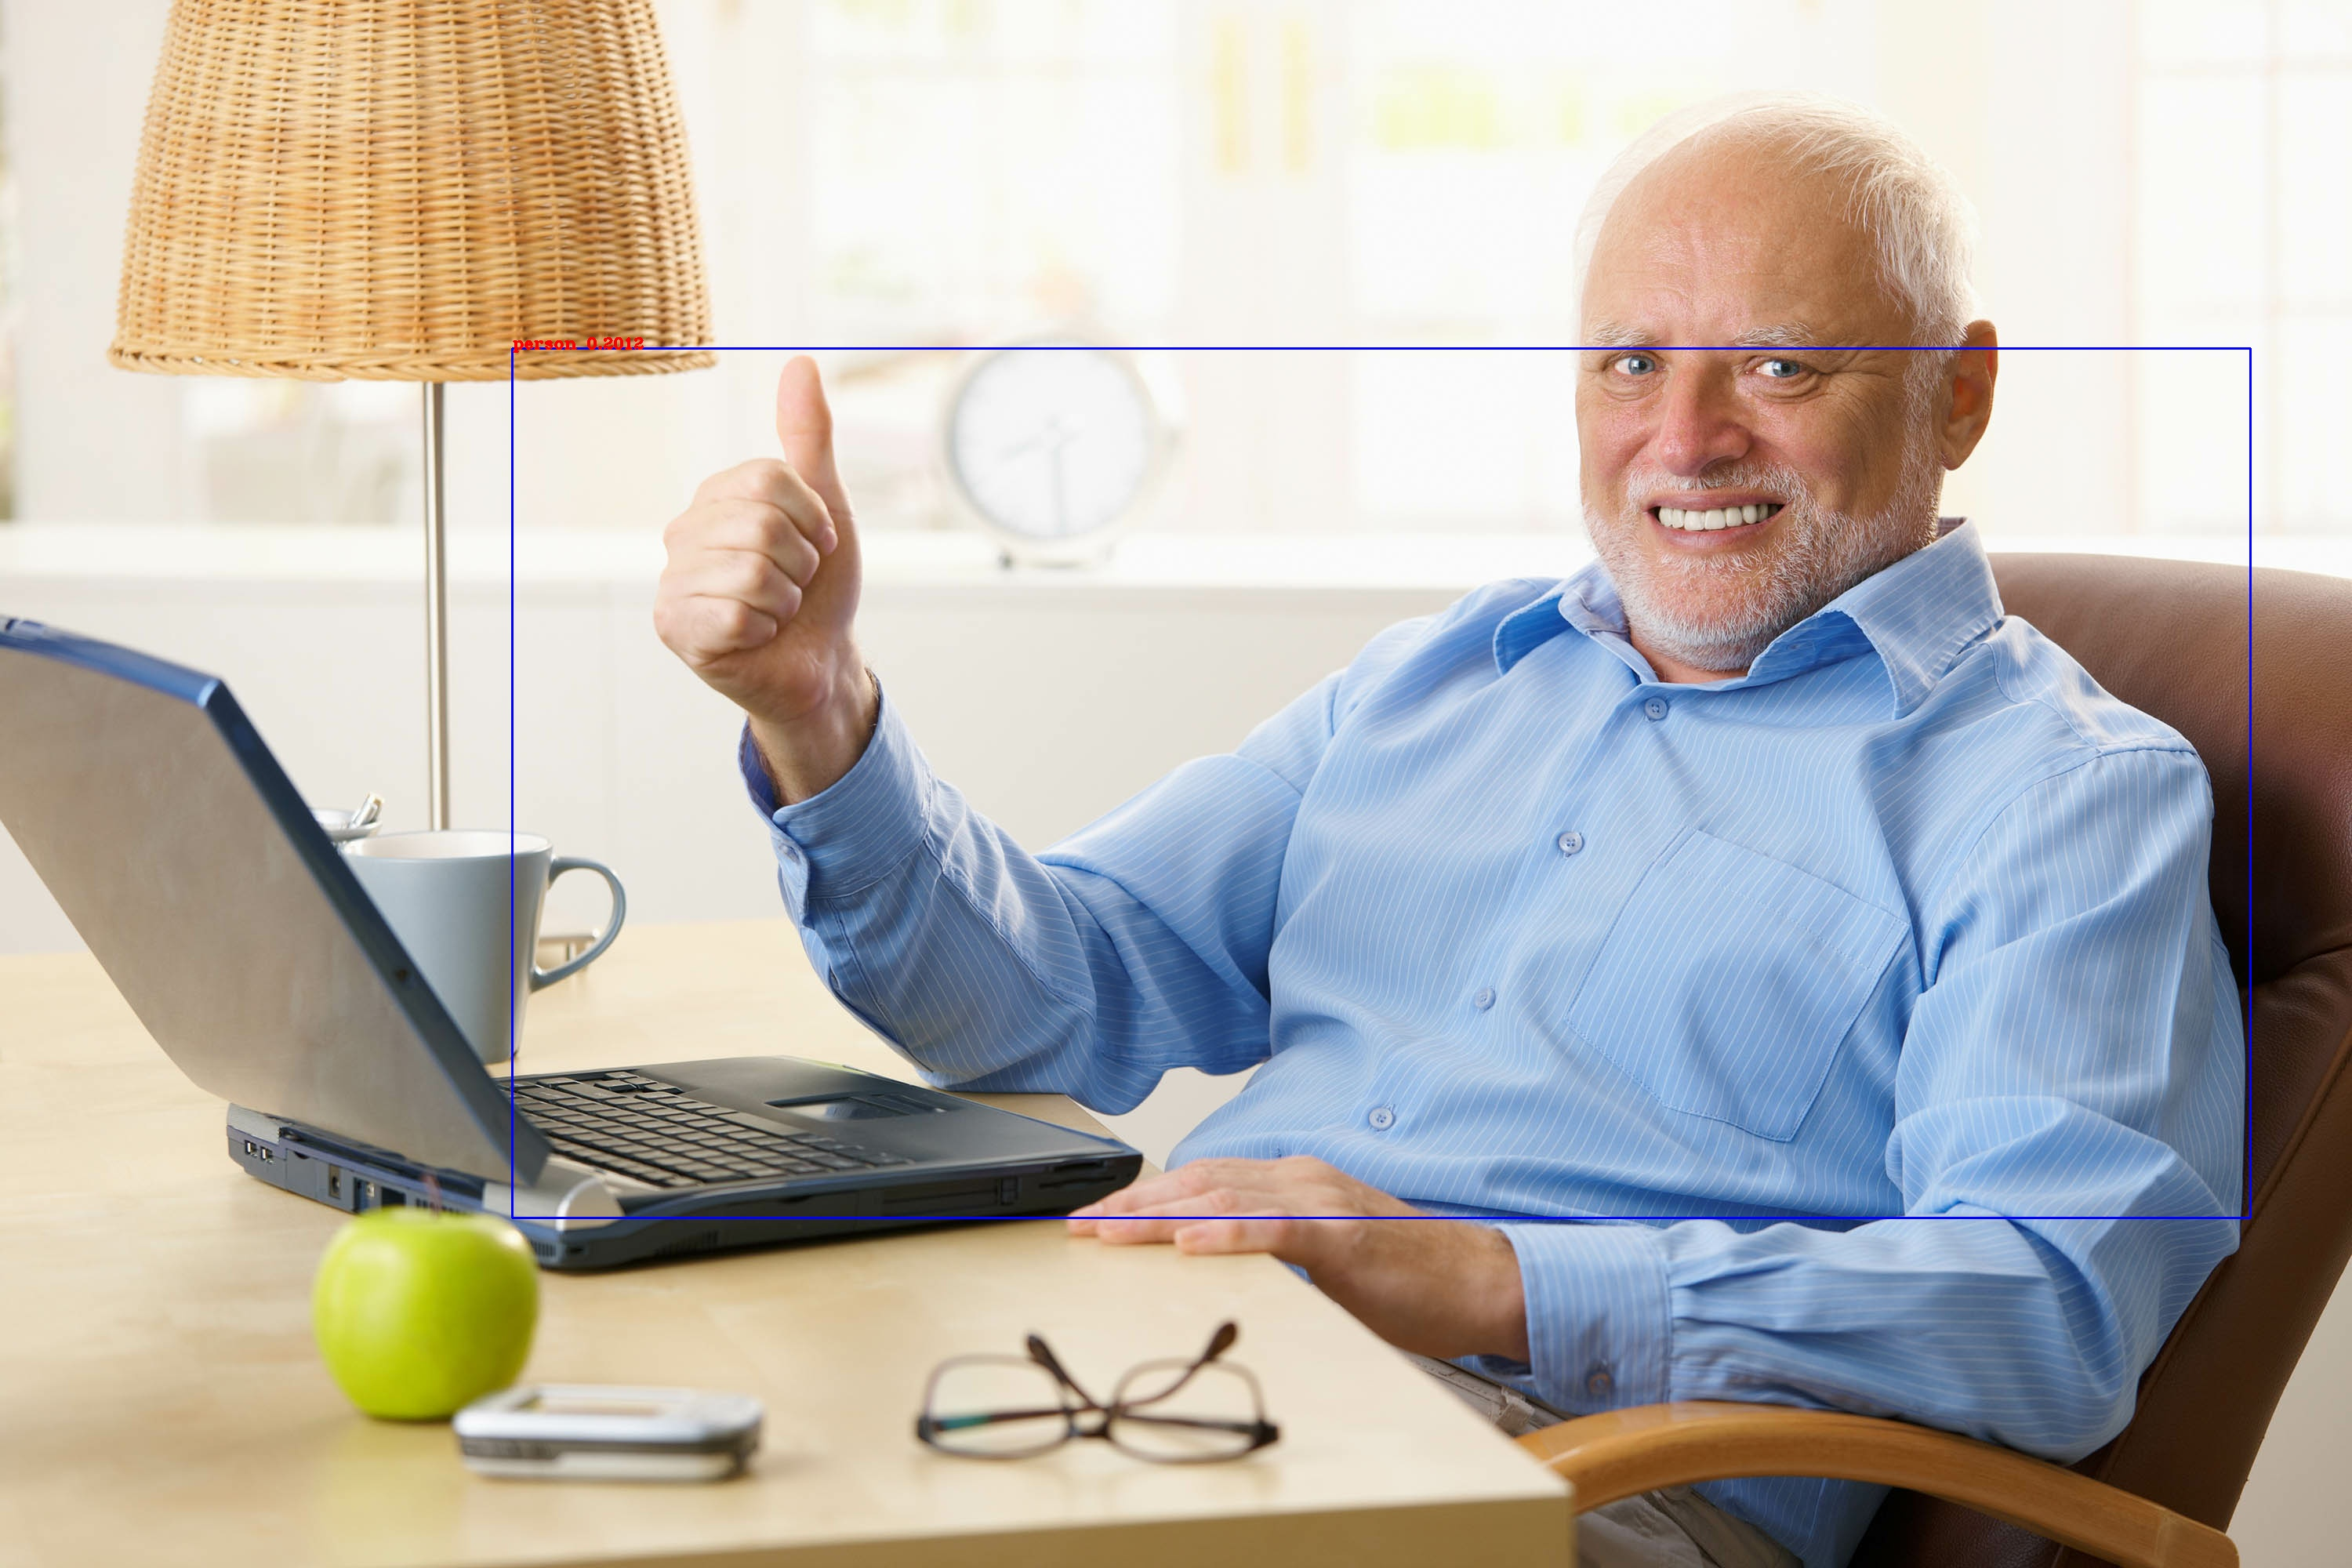

In [ ]:
FLAGS.num_classes = 20
FLAGS.classes = 'data/voc2012.names'
FLAGS.weights = 'checkpoints/yolov3_train_3.tf'
FLAGS.image = 'data/meme.jpg'

# Lower threshold due to insufficient training
FLAGS.yolo_iou_threshold = 0.2
FLAGS.yolo_score_threshold = 0.2

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

from IPython.display import Image, display
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))